In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")
! pip install catboost

In [2]:
df=pd.read_csv("Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
summary = df.describe(include='all')
print("Statistical Summary:\n", summary)

Statistical Summary:
          Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000       

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [8]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)

In [9]:
# Feature scaling
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

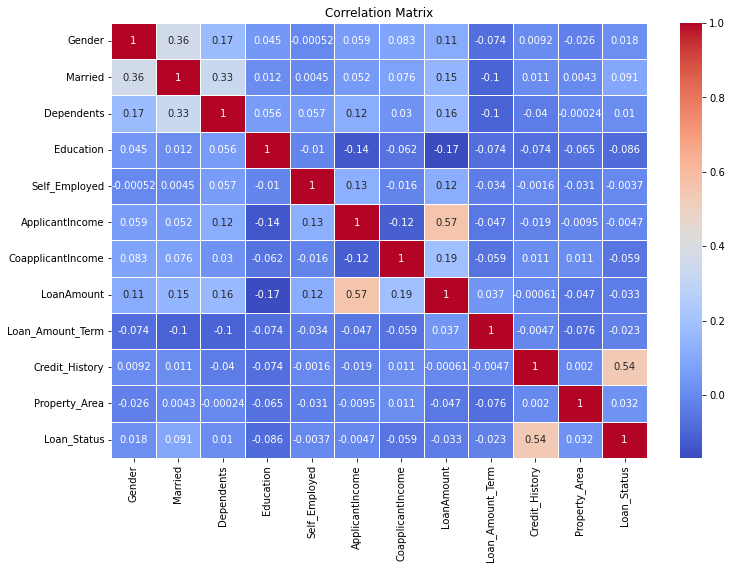

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

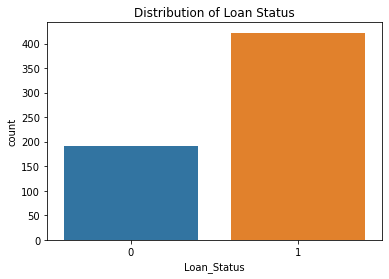

In [11]:
# Distribution of Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

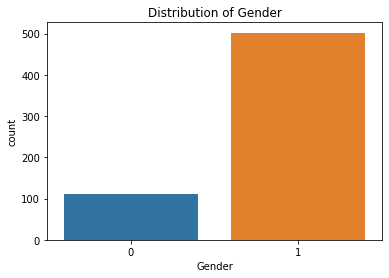

In [12]:
# Count plot for 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

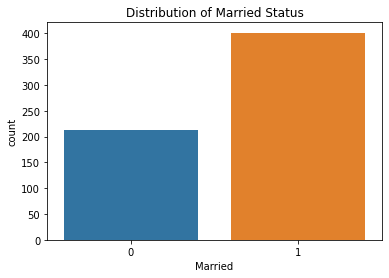

In [13]:
# Count plot for 'Married'
plt.figure(figsize=(6, 4))
sns.countplot(x='Married', data=df)
plt.title('Distribution of Married Status')
plt.show()

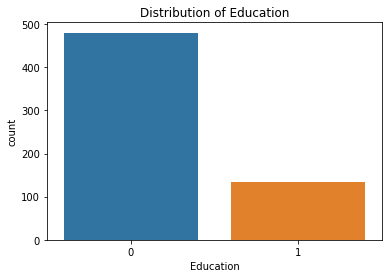

In [14]:
# Count plot for 'Education'
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education')
plt.show()

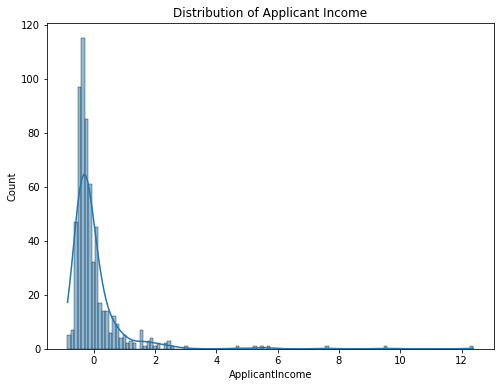

In [15]:
# Distribution plot for 'ApplicantIncome'
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.show()


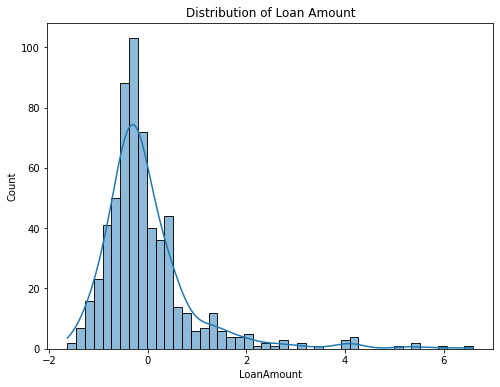

In [16]:
# Distribution plot for 'LoanAmount'
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

In [17]:
# Split the data into training and testing sets
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred_lr = lr_model.predict(X_test)

In [20]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", report_lr)

Logistic Regression Accuracy: 0.7783783783783784
Confusion Matrix:
 [[ 27  38]
 [  3 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        65
           1       0.75      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.83      0.70      0.71       185
weighted avg       0.81      0.78      0.75       185



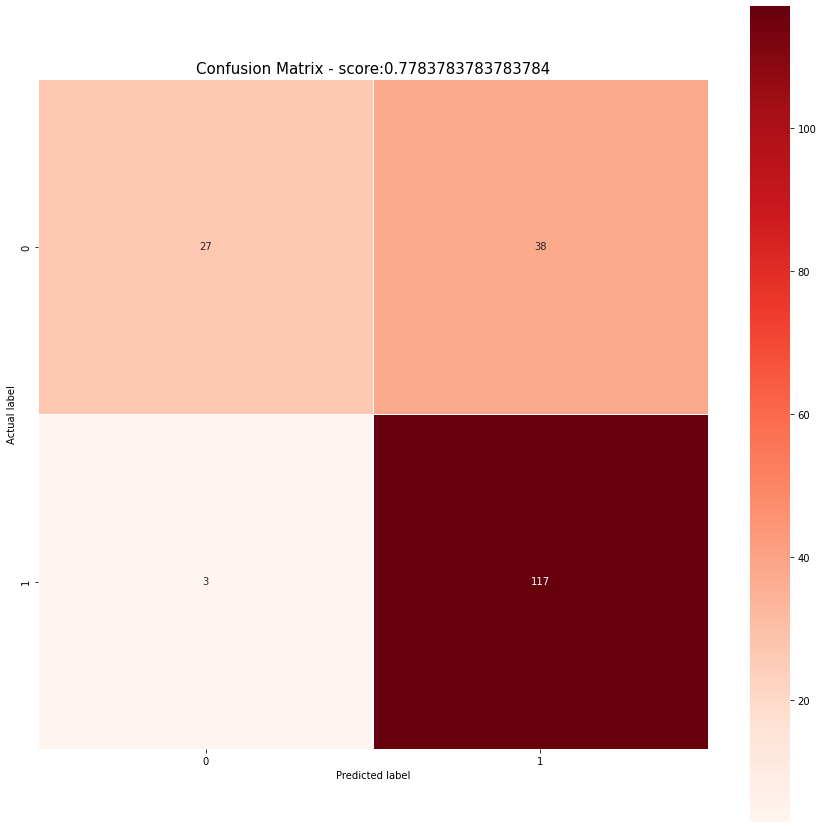

In [21]:
cnf_mat1 = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred_lr))
plt.title(all_sample_title, size = 15);
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred_dt = dt_model.predict(X_test)

In [24]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [25]:
print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", report_dt)

Decision Tree Accuracy: 0.6486486486486487
Confusion Matrix:
 [[34 31]
 [34 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51        65
           1       0.74      0.72      0.73       120

    accuracy                           0.65       185
   macro avg       0.62      0.62      0.62       185
weighted avg       0.65      0.65      0.65       185



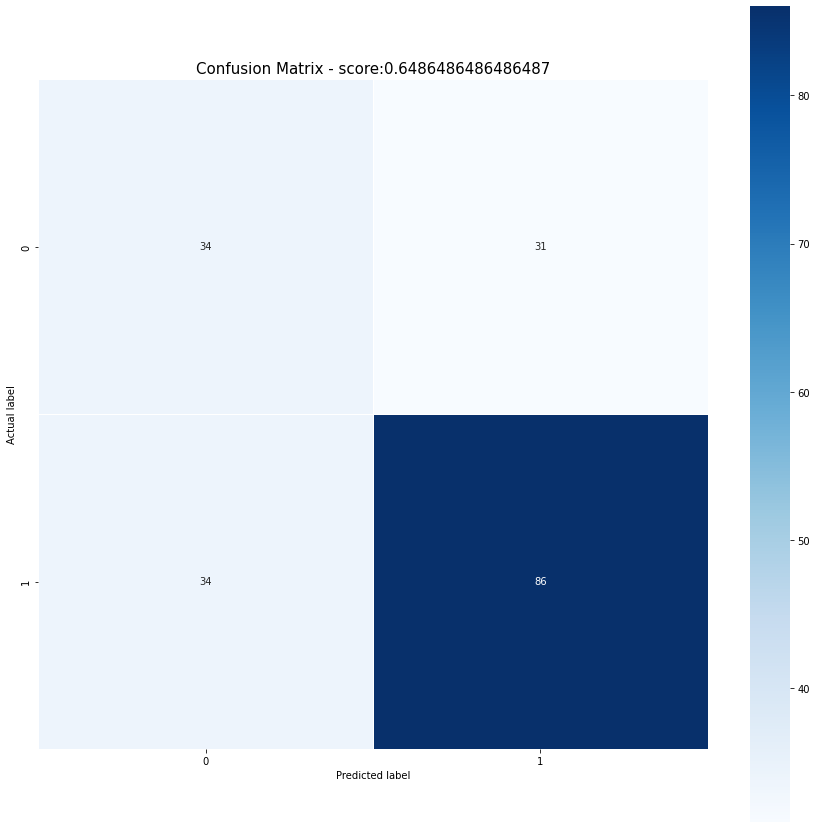

In [26]:
cnf_mat2 = confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred_dt))
plt.title(all_sample_title, size = 15);
plt.show()

In [27]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [28]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", report_xgb)

XGBoost Accuracy: 0.7621621621621621
Confusion Matrix:
 [[ 33  32]
 [ 12 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60        65
           1       0.77      0.90      0.83       120

    accuracy                           0.76       185
   macro avg       0.75      0.70      0.72       185
weighted avg       0.76      0.76      0.75       185



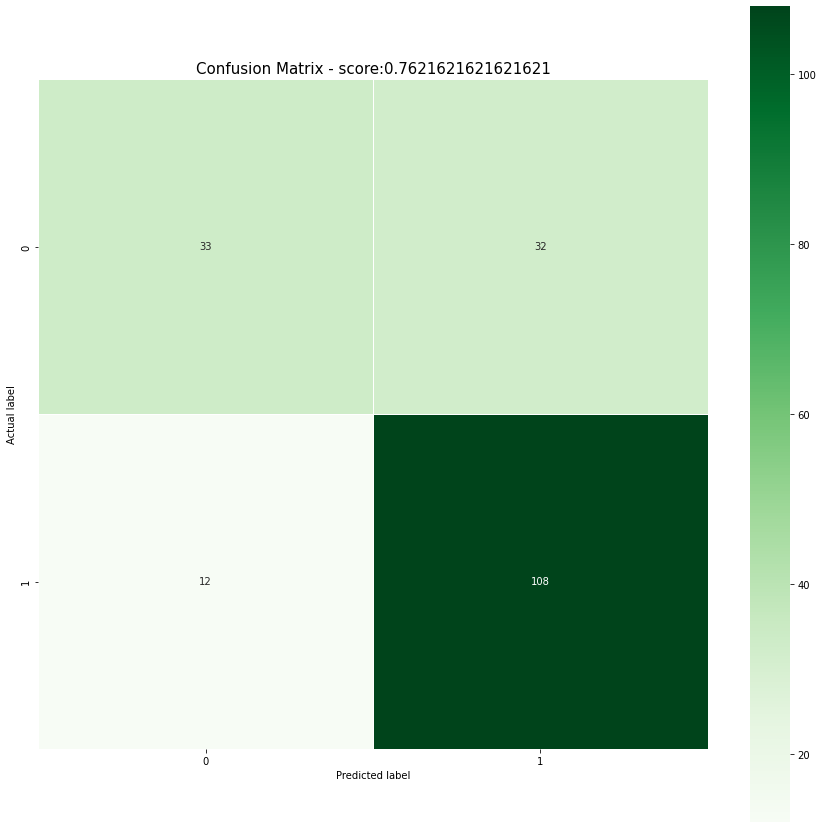

In [29]:
cnf_mat3 = confusion_matrix(y_test,y_pred_xgb)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred_xgb))
plt.title(all_sample_title, size = 15);
plt.show()

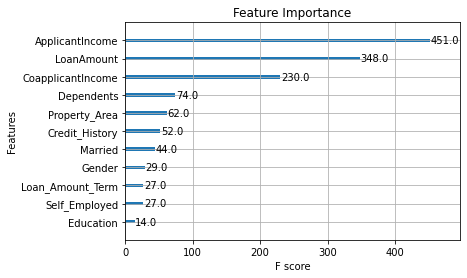

In [30]:
# Plot feature importance
xgb.plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

y_pred_gbc = gbc_model.predict(X_test)

In [32]:
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
report_gbc = classification_report(y_test, y_pred_gbc)

In [33]:
print("GradientBoostingClassifier Accuracy:", accuracy_gbc)
print("Confusion Matrix:\n", conf_matrix_gbc)
print("Classification Report:\n", report_gbc)

GradientBoostingClassifier Accuracy: 0.7567567567567568
Confusion Matrix:
 [[ 26  39]
 [  6 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.40      0.54        65
           1       0.75      0.95      0.84       120

    accuracy                           0.76       185
   macro avg       0.78      0.68      0.69       185
weighted avg       0.77      0.76      0.73       185



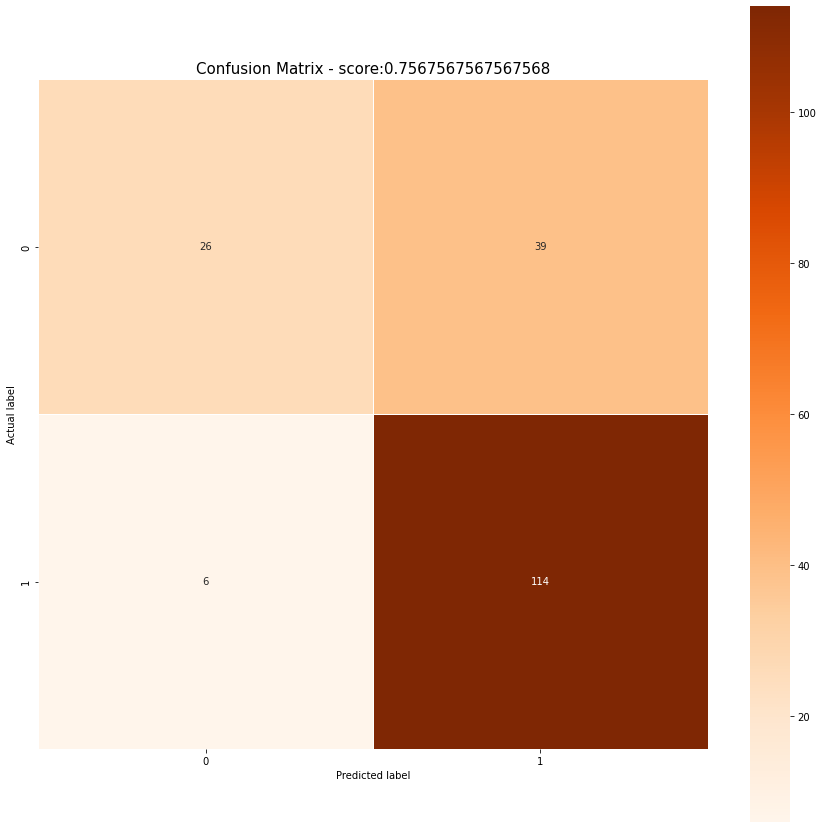

In [34]:
cnf_mat4 = confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat4, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred_gbc))
plt.title(all_sample_title, size = 15);
plt.show()

In [35]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train)

In [ ]:
y_pred_cat = cat_model.predict(X_test)

In [ ]:
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
report_cat = classification_report(y_test, y_pred_cat)

In [ ]:
print("CatBoostClassifier:", accuracy_cat)
print("Confusion Matrix:\n", conf_matrix_cat)
print("Classification Report:\n", report_cat)

CatBoostClassifier: 0.8
Confusion Matrix:
 [[ 32  33]
 [  4 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        65
           1       0.78      0.97      0.86       120

    accuracy                           0.80       185
   macro avg       0.83      0.73      0.75       185
weighted avg       0.82      0.80      0.78       185



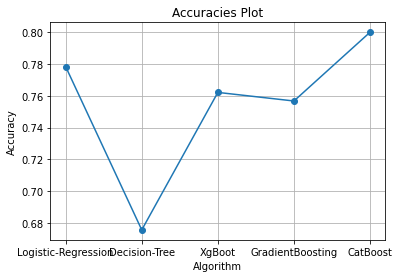

In [ ]:
accuracies = [accuracy_lr,accuracy_dt,accuracy_xgb,accuracy_gbc,accuracy_cat]
plt.plot(accuracies, marker='o', linestyle='-')
plt.title('Accuracies Plot')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracies)), ['Logistic-Regression', 'Decision-Tree', 'XgBoot','GradientBoosting','CatBoost'])
plt.grid(True)
plt.show()

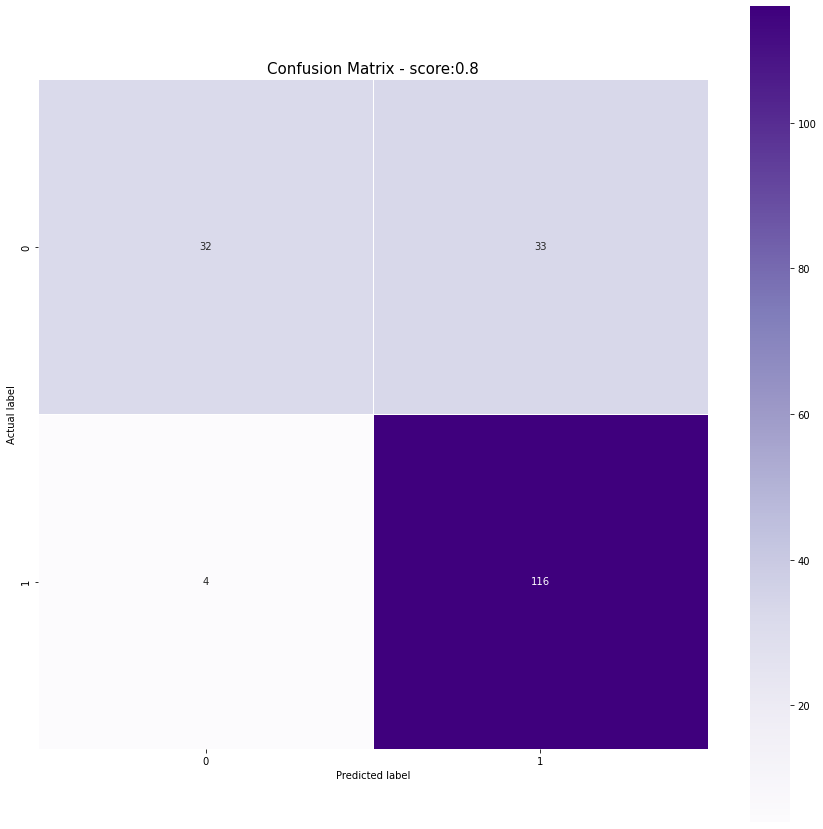

In [ ]:
cnf_mat5 = confusion_matrix(y_test,y_pred_cat)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat5, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Purples');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred_cat))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
import plotly.graph_objects as go

accuracies = [accuracy_lr,accuracy_dt,accuracy_xgb,accuracy_gbc,accuracy_cat]  
algorithms = ['Logistic-Regression', 'Decision Tree', 'XGBoost','GradientBoosting','CatBoost']

# Creating the plot
fig = go.Figure(data=go.Scatter(
    x=algorithms, 
    y=accuracies, 
    mode='markers+lines', 
    marker=dict(symbol='circle', size=10), 
    line=dict(width=2)
))

# Adding titles and labels
fig.update_layout(
    title='Accuracy Scores of Different Algorithms',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy Score',
    yaxis=dict(range=[0, 1])  
)
fig.show()


# CatBoost performs well and is the Winner